In [1]:
import pandas as pd
import numpy as np

csv_path  = '../resources/flood_images_annot.csv'
csv_flow_path = '../resources/flood_flow_annot.csv'

In [2]:
df = pd.read_csv(csv_path, parse_dates=['datetime'], index_col=0)
df['level'] = pd.to_numeric(df['level'])
df[df['level']==5] = np.nan

In [3]:
df_clean = df[df['level']!=0]
mask = df_clean['place'].isna()
df_clean.loc[mask, 'place'] = 'unknown'
df_clean = df_clean[ df_clean['place'].str.contains('SHOP') ]

print(df_clean['level'].value_counts(normalize=False))
print(df_clean['level'].value_counts(normalize=True))

1.0    67803
2.0      535
3.0      186
4.0       75
Name: level, dtype: int64
1.0    0.988396
2.0    0.007799
3.0    0.002711
4.0    0.001093
Name: level, dtype: float64


In [4]:
df_rel = pd.read_csv(csv_flow_path, parse_dates=['datetime'], index_col=0)
df_rel[ 'level_prev' ] = pd.to_numeric(df_rel['level_prev'] )
df_rel[ 'level_next' ] = pd.to_numeric(df_rel['level_next'] )

df_rel['level'] = df_rel['level_next'] - df_rel['level_prev']
df_rel['level'] = df_rel['level'].clip(lower=-1, upper=1) + 2

print(df_rel['level'].value_counts(normalize=False))
print(df_rel['level'].value_counts(normalize=True))

2.0    68023
1.0      129
3.0      121
Name: level, dtype: int64
2.0    0.996338
1.0    0.001889
3.0    0.001772
Name: level, dtype: float64


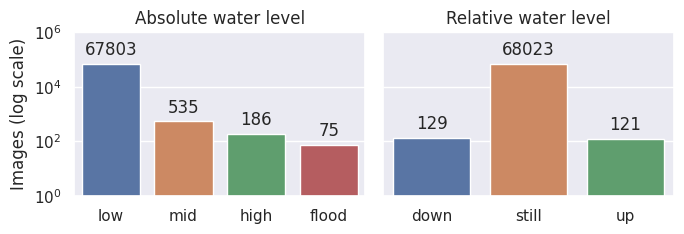

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')

fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7,2.5))

sns.countplot(ax=axs[0], x='level', data=df_clean)
sns.countplot(ax=axs[1], x='level', data=df_rel)

axs[0].set_title('Absolute water level')
axs[0].set_xticklabels(['low','mid','high','flood'])
axs[1].set_title('Relative water level')
axs[1].set_xticklabels(['down','still','up'])

axs[0].set_ylabel('Images (log scale)')
axs[1].set_ylabel('')

for ax in axs:
    ax.set_yscale('log')
    ax.set_ylim((1,1e6))
    ax.set_xlabel('')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

fig.tight_layout()
fig.savefig('class_images.pdf')

plt.show()

In [12]:
df_shop = df_clean[df_clean['place'].str.contains('SHOP')]

print(df_shop['level'].value_counts(normalize=True))

1.0    0.988396
2.0    0.007799
3.0    0.002711
4.0    0.001093
Name: level, dtype: float64
